In [1]:
!wget https://syncandshare.lrz.de/dl/fiMBavGt2aPijY8pjiKESWFF/urbanareas_no2_all.csv -P /tmp/

--2020-01-26 19:46:43--  https://syncandshare.lrz.de/dl/fiMBavGt2aPijY8pjiKESWFF/urbanareas_no2_all.csv
Resolving syncandshare.lrz.de (syncandshare.lrz.de)... 129.187.255.213
Connecting to syncandshare.lrz.de (syncandshare.lrz.de)|129.187.255.213|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74521888 (71M) [text/csv]
Saving to: ‘/tmp/urbanareas_no2_all.csv.1’

urbanareas_no2_all. 100%[===================>]  71,07M  11,2MB/s    in 6,4s    

2020-01-26 19:46:50 (11,2 MB/s) - ‘/tmp/urbanareas_no2_all.csv.1’ saved [74521888/74521888]



In [3]:
import pandas as pd
pd.read_csv("/tmp/urbanareas_no2_all.csv")

,system:index,City,City_Alter,Country,date,imageID,pop2020,value,.geo
0,20180628T102407_20180704T120838_00000000000000...,Al-Qahirah,Cairo,Egypt,2018-06-28T10:45:42,20180628T102407_20180704T120838,13460.0,0.000263,"{""type"":""Point"",""coordinates"":[31.250798176683..."
1,20180628T102407_20180704T120838_00000000000000...,Istanbul,NaN,Turkey,2018-06-28T10:45:42,20180628T102407_20180704T120838,11180.0,0.000137,"{""type"":""Point"",""coordinates"":[29.006001983459..."
2,20180628T102407_20180704T120838_00000000000000...,Moskva,Moscow,Russian Federation,2018-06-28T10:45:42,20180628T102407_20180704T120838,10520.0,0.000230,"{""type"":""Point"",""coordinates"":[37.700000489383..."
3,20180628T102407_20180704T120838_00000000000000...,Paris,NaN,France,2018-06-28T10:45:42,20180628T102407_20180704T120838,10010.0,0.000125,"{""type"":""Point"",""coordinates"":[2.4329970122864..."
4,20180628T102407_20180704T120838_00000000000000...,London,NaN,United Kingdom,2018-06-28T10:45:42,20180628T102407_20180704T120838,8620.0,0.000150,"{""type"":""Point"",""coordinates"":[-0.178002854952..."
...,...,...,...,...,...,...,...,...,...
316741,20191211T174122_20191215T182706_00000000000000...,San Miguel de Tucum�n,San Miguel De Tucuman,Argentina,2019-12-11T18:02:57,20191211T174122_20191215T182706,870.0,0.000089,"{""type"":""Point"",""coordinates"":[-65.21400063766..."
316742,20191211T174122_20191215T182706_00000000000000...,Oklahoma City,NaN,United States of America,2019-12-11T18:02:57,20191211T174122_20191215T182706,850.0,0.000138,"{""type"":""Point"",""coordinates"":[-97.53000225129..."
316743,20191211T174122_20191215T182706_00000000000000...,Dayton,NaN,United States of America,2019-12-11T18:02:57,20191211T174122_20191215T182706,840.0,0.000095,"{""type"":""Point"",""coordinates"":[-84.19166717506..."
316744,20191211T174122_20191215T182706_00000000000000...,Rochester,NaN,United States of America,2019-12-11T18:02:57,20191211T174122_20191215T182706,820.0,0.000077,"{""type"":""Point"",""coordinates"":[-77.63561142382..."


In [4]:
dataset_url = "https://syncandshare.lrz.de/dl/fiSyp278PifiEghWNsnpH161/germany.csv"
dataset_local_path = "/tmp/germany.csv"
dataset_local_npz = "/tmp/germany.npz"

assert sum(split_ratio) == 1

np.random.seed(seed=0)
self.fold = fold
self.seq_length = seq_length
self.split_ratio = split_ratio

self.verbose = verbose

if not os.path.exists(self.dataset_local_path) or overwrite:
    self.print(f"No Dataset found at {self.dataset_local_path}. Downloading from {self.dataset_url}")
    download_url(self.dataset_url, self.dataset_local_path)
else:
    self.print(f"local dataset found at {self.dataset_local_path}")

if not os.path.exists(self.dataset_local_npz) or overwrite:
    self.print(f"no cached dataset found at {self.dataset_local_npz}. partitioning data in train/valid/test {split_ratio[0]}/{split_ratio[1]}/{split_ratio[2]} caching csv to npz files for faster loading")
    self.save_npz()

self.print(f"loading cached dataset found at {self.dataset_local_npz}")
self.data, self.meta = self.load_npz()


data = self.data[:,:,1].astype(float)
if znormalize:
    self.mean = np.nanmean(data)
    self.std = np.nanstd(data)
    data -= self.mean
    data /= 0.5*self.std
else:
    data *= 1e-4

#ndvi = self.data[:,:,1].astype(float)  * 1e-4

ndvi = interpolate_nans(data)

self.date = self.data[:, :, 0]
if include_time:
    dates = self.data[:, :, 0]
    #year = dates.astype('datetime64[Y]').astype(int) + 1970
    doy = dates.astype(np.datetime64) - dates.astype('datetime64[Y]')
    doy = doy.astype(float) / 365
    self.data = np.dstack([ndvi, doy])
else:
    self.data = ndvi[:,:,None]

self.x_data, self.y_data = transform_data(self.data, seq_len=self.seq_length)


NameError: name 'split_ratio' is not defined

In [38]:
import sys
sys.path.append('..')
from dataset import Sentinel5Dataset
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import numpy as np

dataset = Sentinel5Dataset(fold="train",
                 verbose=True,
                 split_ratio = [.6,.2,.2],
                 seq_length=100)


def plot_ts(ax, city):
    data = pd.DataFrame(dataset.data[city], columns=["date","no2"]).set_index("date")
    data.index = pd.to_datetime(data.index)
    ax.plot(data)
    #ax.set_xlabel("date")
    ax.set_ylabel(r"NO$^2$")
    ax.set_title(city)

local dataset found at /tmp/urbanareas_no2_all.csv
loading cached dataset found at /tmp/urbanareas_no2_all.npz


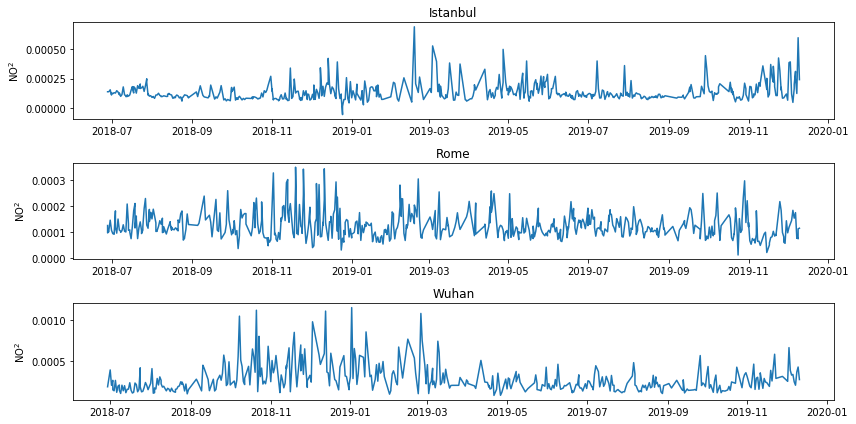

In [48]:
city = "Istanbul"
fig,axs = plt.subplots(3,1,figsize=(12,6))
axs = np.array(axs).reshape(-1)

ax = axs[0]
cities = ["Istanbul","Rome","Wuhan"]
for city, ax in zip(cities,axs):
    plot_ts(ax,city)
plt.tight_layout()

In [49]:
dataset.meta

,fid,x,y,city
0,225,-112.11,33.509,Phoenix-Mesa
1,14,12.52,41.88,Rome
2,85,3.3,6.45,Lagos
3,418,112.6,26.9,Hengyang
4,132,-0.367002,39.471,Valencia
...,...,...,...,...
349,580,104.071,30.67,Chengdu
350,254,-107.386,24.805,Culiac�n
351,538,51.448,35.774,Tehran
352,432,112.733,37.6833,Yuci


/home/marc/miniconda3/envs/igarss2020/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


(-15224333.888820574, 18570924.866232507, -5208787.954928827, 9093712.62669915)

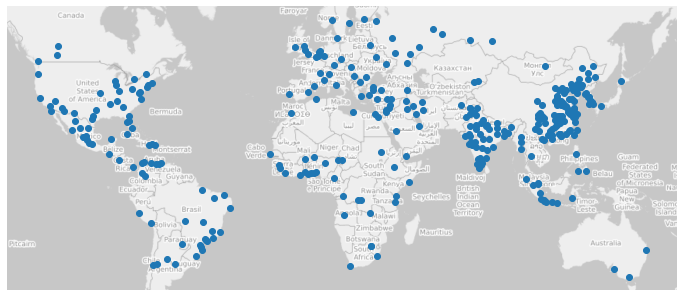

In [92]:

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))
    
import geopandas as gpd
#!pip install contextily
import contextily as ctx

fig,ax = plt.subplots(figsize=(12,6))


gdf = gpd.GeoDataFrame(
    dataset.meta, geometry=gpd.points_from_xy(dataset.meta.x,dataset.meta.y),crs=4326).to_crs(epsg=3857)

#ax.scatter(dataset.meta.x,dataset.meta.y)
gdf.geometry.plot(ax=ax)

#url = "http://a.tile.stamen.com/terrain/tileZ/tileX/tileY.png"
url = "http://tiles.wmflabs.org/bw-mapnik/tileZ/tileX/tileY.png"
#url = "https://mt1.google.com/vt/lyrs=m&x=tileX&y=tileY&z=tileZ"
add_basemap(ax,2,url)
ax.axis('off')
#ax.set_ylim(-180,180)


In [72]:
dataset.meta


/home/marc/miniconda3/envs/igarss2020/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


<Figure size 432x288 with 0 Axes>